## Additional notes for Lectures 1-2

In [5]:
import numpy as np

### Reshaping ("largest index changes fastest" principle)

In [6]:
x = np.array([1, 2, 3, 4, 5, 6])
print(x)

[1 2 3 4 5 6]


In [7]:
y = x.reshape(2,3)
print(y)

[[1 2 3]
 [4 5 6]]


In [8]:
a = np.arange(1,13)
print(a)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [9]:
b = a.reshape(3,2,2)
print(b)

[[[ 1  2]
  [ 3  4]]

 [[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]


In [10]:
b[0,1,0]

3

### View vs. copy

In [11]:
x = np.array([1,2,3,4,5,6])
print(x)

[1 2 3 4 5 6]


In [12]:
y = x.reshape(2,3)
print('Original y = \n', y)

Original y = 
 [[1 2 3]
 [4 5 6]]


In [13]:
y[0,2] = 50 #change entry [0,0] in y
print('Modified y = \n', y)

Modified y = 
 [[ 1  2 50]
 [ 4  5  6]]


In [14]:
print(x) #entry [0,0] has changed in x as well now. y is a VIEW of x (i.e., y is just another way to 'access' x)

[ 1  2 50  4  5  6]


In [15]:
x = np.array([1,2,3,4,5,6])
z = x.reshape(2,3).copy() #z is a new 'independent' reshaped COPY version of x
z[0,0] = 100
print('z = \n',z)
print('x = \n',x) #now x has not changed: still [1 2 3 4 5 6]

z = 
 [[100   2   3]
 [  4   5   6]]
x = 
 [1 2 3 4 5 6]


### Selecting function output arguments

In [16]:
def f(x, a, b, c):
    """
    Parameters
    ----------
    x, a, b, c : Scalar values
    
    Returns
    -------
    Returns three outputs: a*x^2, bx and c
    """
    return a*x**2, b*x, c

In [19]:
x = 2
a,b,c = 2,3,9
g = f(x,a,b,c) 
print('Output is tuple g = \n',g)

for i in range(len(g)):
    print('Output argument g[%.i] is %.i' % (i, g[i]))

Output is tuple g = 
 (8, 6, 9)
Output argument g[0] is 8
Output argument g[1] is 6
Output argument g[2] is 9


We can suppress individual outputs with `_`

In [20]:
g1,_,_ = f(2,2,3,9) #Stores first output argument in g1
_,g2,_ = f(2,2,3,9) #Stores second output argument in g2
_,_,g3 = f(2,2,3,9) #Stores third output argument in g3
print(g1,g2,g3)

8 6 9


In [21]:
h1,h2,_ = f(2,2,3,9) #Stores first/second output argument in h1/h2, resp.
print(h1,h2)

8 6


If we only want first/last argument, we can use `*_` to suppress ALL other outputs.

In [ ]:
g1, *_ = f(2,2,3,9) #Only first output argument
print(g1)
*_, g3 = f(2,2,3,9) #Only last output argument
print(g3)

### Setting (default) function inputs

It is possible to define 'default' inputs for parameters that are not specified when calling a function. The order is important here: Parameters with a default value should be given last!

In [25]:
def squares(a,b,c=3,d=5): #a and b are called 'non-default arguments' and c and d 'default arguments'
    """
    Parameters
    ----------
    a,b,c,d : Scalar values
    
    Returns
    -------
    Returns squares of numbers a,b,c,d in array
    """
    x = np.array([a,b,c,d])
    return np.multiply(x,x) #a^2, b^2, c^2, d^2

In [26]:
a,b,c,d = 1,2,2,4
x = squares(a,b,c,d)
print(x)

[ 1  4  4 16]


In [27]:
y = squares(a,b) #In this case, we only give values for a and b. In 'summation' this means c will be set to 3, and d to 5
print(y)

[ 1  4  9 25]


One can also set up default arguments in such a way that their value depends on that of (one of the) other input arguments.

In [35]:
def squares(a,b,c=3,d=None): #a and b are called 'non-default arguments' and c and d 'default arguments'
    """
    Parameters
    ----------
    a,b,c,d : Scalar values
    
    Returns
    -------
    Returns squares of numbers a,b,c,d in array
    """
    if d is None:
        d = 3*a*c
    x = np.array([a,b,c,d])
    return np.multiply(x,x)

In [36]:
y = squares(a,b) #In this case, c is set to 3, which means d = 3*a*c = 3*1*3 = 9, so that d^2 = 81 in the output.
print(y)

[ 1  4  9 81]


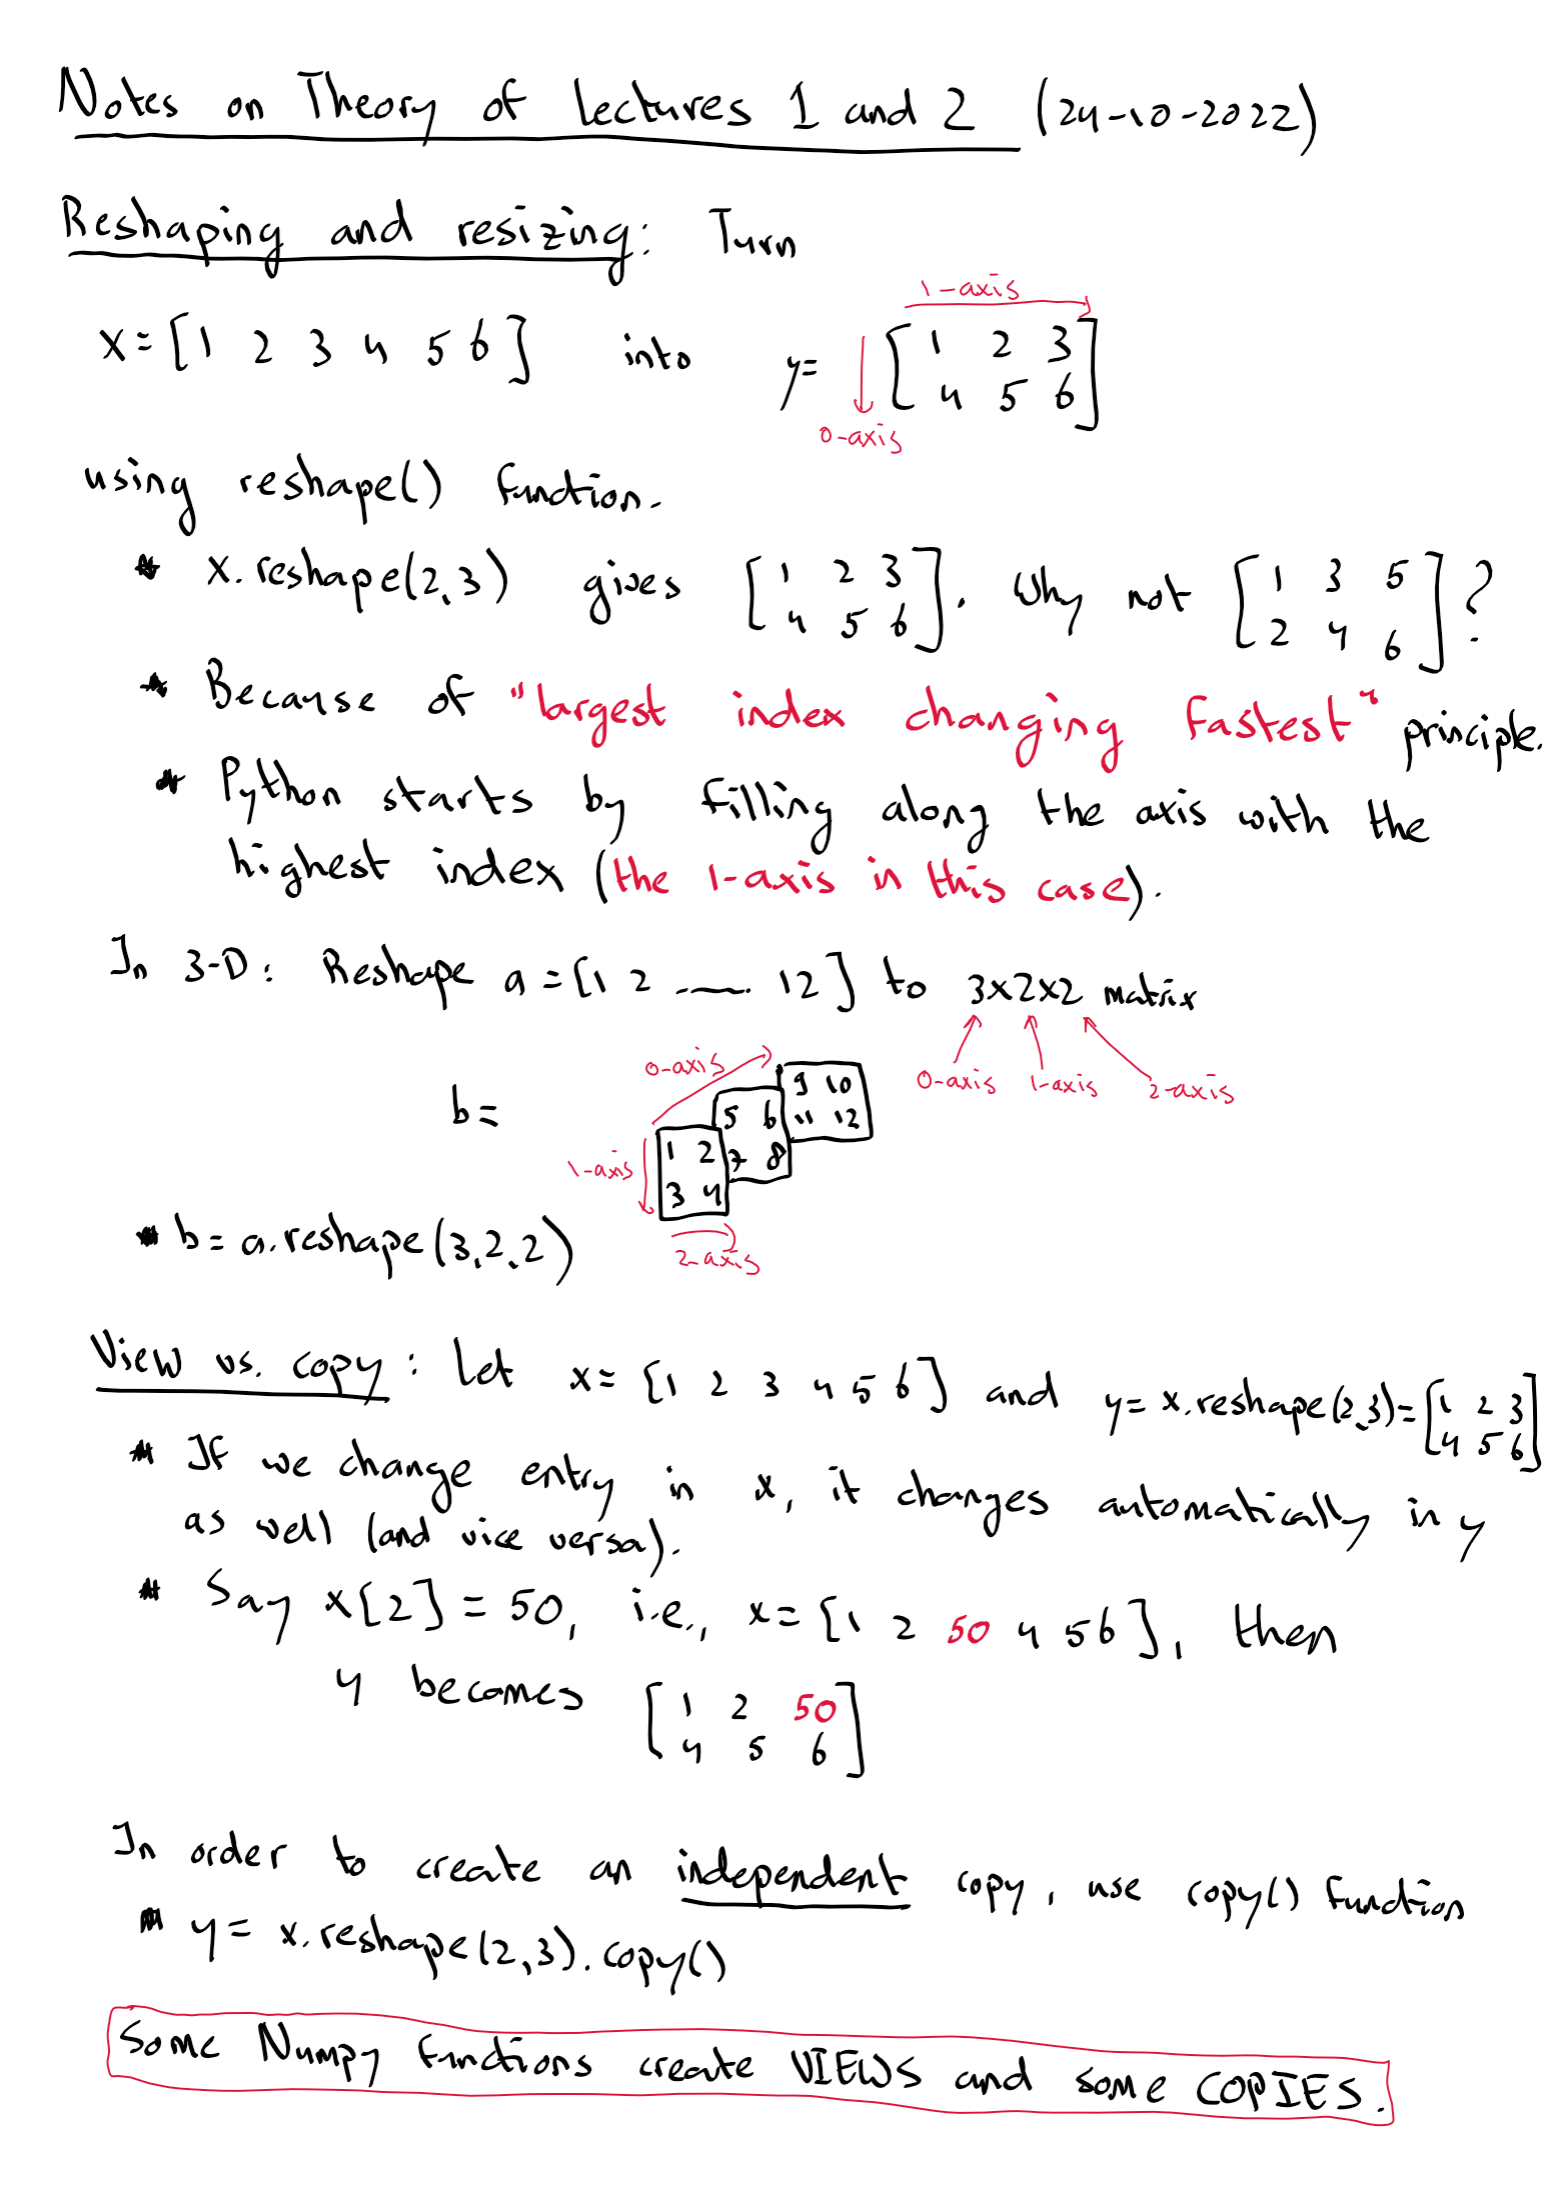